<a href="https://colab.research.google.com/github/Bavalpreet/BMU_Notebooks/blob/main/feature%20selection/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction

Often you'll have hundreds or thousands of features after various encodings and feature generation. This can lead to two problems. First, <font color='red'>`the more features you have, the more likely you are to overfit to the training and validation sets`</font>. This will cause your model to perform worse at generalizing to new data.

Secondly, <font color='red'>`the more features you have, the longer it will take to train your model and optimize hyperparameters`</font>. Also, when building user-facing products, you'll want to make inference as fast as possible. Using fewer features can speed up inference at the cost of predictive performance.

Let's get Started

## Very Important Question



## **Ques** - What is the  difference between dimensionality reduction and feature selection ?



Feature selection is different from dimensionality reduction. `Both methods tend to reduce the number of attributes` in the dataset, but a **`dimensionality reduction method`** does so by **creating new combinations of attributes** (sometimes known as feature transformation), whereas **`feature selection methods`** **include and exclude attributes** present in the data without changing them.

**Some examples of dimensionality reduction methods are Principal Component Analysis, Singular Value Decomposition, Linear Discriminant Analysis, etc.**

## **Ques** - When we do feature selection before doing test train split or after test train split and why?

we will do it after doing test train split before giving the data to train and why not before to prevent it from overfitting.

### Importance of Feature selection
     * It enables the machine learning algorithm to train faster.
     * It reduces the complexity of a model and makes it easier to interpret.
     * It improves the accuracy of a model if the right subset is chosen.
     * It reduces Overfitting.


## <font color='red'>Simple TIP</font>(Remove constant features)



1. Remove those features that have zero variance (i.e there is only single value in complete column)
    Example for Dataset there is a column that has only a single value for all rows remove that feature.

### For this Purpose we will be using Classifcation dataset 

In [ ]:
import pandas as pd
import numpy as np
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = ['pregnancies', 'glucose', 'BP', 'skin-thick', 'insulin', 'BMI', 'pedi', 'age', 'class']
names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)

In [ ]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# To numpy for fast computation
array = df.values
X = array[:,0:8]
Y = array[:,8]

## In this class we'll cover


In case you don't know **P-Value** click [here](https://www.youtube.com/watch?v=KS6KEWaoOOE)

### 1. **Filter Method**


![text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537552825/Image3_fqsh79.png)

Filter methods select features from a dataset independently for any machine learning algorithm.
These methods rely only on the characteristics of these variables, so features are filtered out of 
the data before learning begins.These methods are powerful and simple and help to quickly 
remove features— and they are generally the first step in any feature selection pipeline.


Ex :- Chi-squared Test, ANOVA-F test, Pearson Correlation

### 2. **Wrapper Method**

![alt text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549832/Image2_ajaeo8.png)

Ex :- Forward Elimination, Backward Elimination and Recursive Feature Elimination

1. **Forward Elimination**

> The procedure starts with an empty set of features. The best of the original features is determined and added to the reduced set. At each subsequent iteration, the best of the remaining original attributes is added to the set.

2. **Backward Elimination** :-

> n backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

And What is **Recursive Feature Elimination**:-
> It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

### 3. **Penalization/ Embedded methods**

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration
examples are lasso and ridge regression.

## How to choose the right feauture selection method




1.   We can see that there are lot of feature selection techniques available.

2.   The following graphic will serve as a guide on how to choose a feature selection method:-



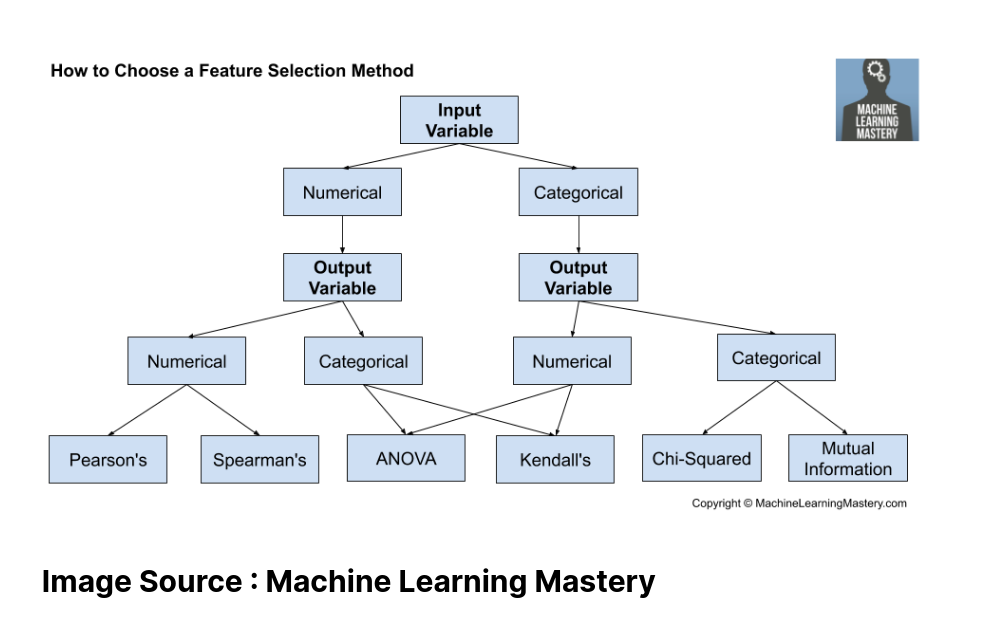

## 1. CHI-Squared Test (Goodness of Fit)

If you want to learn it click [here](https://www.youtube.com/watch?v=2QeDRsxSF9M&t=128s)

1. This statistical test is only applied for Non-Negative features.

2. It is a filter method means this technique dosen't needs **ML algorithm** to select features.


### SKLEARN comes in :)

The scikit-learn library provides the **SelectKBest** class that can be used with a suite of different statistical

tests to select a specific number of features, in this case, it is **Chi-Squared**.

In [ ]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4) # we want to select top 4 features
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


### Those with highest Scores Have Been choosen

So We'll Choose  

Plas,Test,Mass and Age  as our **top4** features

#### Now our Dataset Looks like below :-

In [ ]:
features = fit.transform(X)
# Summarize selected features
print(features[0:5,:]) # Top 5 Rows of Dataset after Chi-squared Test

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


## **Ques** - What is difference between fit and fit transform?

"fit" computes the mean and std to be used for later scaling. (just a computation), nothing is given to you. "transform" uses a previously computed mean and std to autoscale the data (subtract mean from all values and then divide it by std). "fit_transform" does both at the same time.

# 2. Recursive Feature elimination 

It is a Wrapper Method 

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [ ]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
# Feature extraction
model = LogisticRegression(max_iter=2000)
rfe = RFE(estimator=model,n_features_to_select= 3)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 6 5 1 1 3]


### <font color='green'>fit.ranking_</font> tells which features are selected:-
The features that are selected are given Rank=1

Rank=2 and rank=3 corresponds that if we have choose <font color='red'>n_features_to_select</font>=4 our second choice would have been selected

# 3. Embedded Methods

There is a property of <font color='red'>Lasso Regression</font> that after some iterations features that are not important start 

to approach to <font color='red'>ZERO</font> and Ultimately collapse to Zero.

So the features whose coefficients are zero are <font color='red'>NON-ESSENTIAL</font> features for us hence we will remove them

In [ ]:
from sklearn.linear_model import Lasso
data = pd.read_csv("/content/drive/My Drive/bmu_stuff_for_nb/insurance.csv")
encoded_data = pd.get_dummies(data, columns=["sex","smoker","region"])
encoded_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

X = encoded_data[encoded_data.columns[~encoded_data.columns.isin(['charges'])]].to_numpy()
y = encoded_data.charges.to_numpy()

# Dropping any rows with Nan values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 


In [ ]:
from sklearn.linear_model import Lasso
#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso(normalize=True)

#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [ ]:
print ("LASSO model:", pretty_print_coefs(lasso_reg.coef_))

LASSO model: 251.322 * X0 + 299.671 * X1 + 527.422 * X2 + 107.59 * X3 + -0.0 * X4 + -23110.44 * X5 + 0.0 * X6 + 635.516 * X7 + 360.483 * X8 + -194.533 * X9 + -0.0 * X10


 ### 1. It is known as L1-Regularisation
 
    * For correlated features, it means that they tend to get similar coefficients.
    * Feature having negative coefficients don't contribute that much.
 